<a href="https://colab.research.google.com/github/YKochura/ai-lab/blob/main/linear-regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лінійна регресія** &mdash; статистичний регресійний метод, який застосовують для моделювання взаємозв'язку між скалярною залежною змінною $\hat{y}$ та однією або кількома незалежними змінними $\boldsymbol X$.

Наприклад, ми можемо за допомогою лінійної регресії передбачати значення неперервної залежної змінної: температуру повітря, ціну акацій, тощо, використовуючи додаткову інформацію, яка характеризує задачу і представлена  в незалежній змінній $\boldsymbol X$. Ця додаткова інформація представляє собою набір вхідних ознак за якими буде здійснюватись моделювання.


# Модель лінійної регресії

![](https://docs.google.com/uc?export=download&id=1FAY4ZeGCJ1n14d14LtivoYDsz-LhgUpH)

Метод лінійної регресії полягає у знаходженні лінійної комбінації вхідних ознак (зважена сума) з урахуванням зміщення.

$$\hat y = z = \sum_{i=1}^m w_i x_i  + b$$




Для вирішення задачі

**Дано:**

- Навчальний набір: $\{(\boldsymbol{X}^{(1)}, y^{(1)}), (\boldsymbol{X}^{(2)}, y^{(2)}),..., (\boldsymbol{X}^{(n)}, y^{(n)})\}$

  - де $\boldsymbol{X}^{(i)}$ &mdash;  $i$-й навчальний приклад. Є $m$-вимірним вектором-стовпцем $\boldsymbol{X}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$
  - $n$ &mdash; загальна кількість навчальних прикладів
  - $y^{(i)}$ &mdash; дійсне цільове значення $i$-го навчального прикладу , $y^{(i)} \in \mathbb{R}$

Модель лінійної регресії:

- має вектор-рядок дійсних значень ваг $\boldsymbol{W} = \begin{bmatrix}
w_1 & w_2 & \cdots & w_m
\end{bmatrix}$
- має дійсне значення зміщення $b$


# Навчання

Ми можемо навчити модель, використовуючи градієнтний спуск. Фактично, **градієнтний спуск** або будь-який інший алгоритм оптимізації дозволяє знайти глобальний мінімум цільової функції, якщо підбрано оптимальну швидкість навчання та виконано достатню кількість ітерацій навчання.

Навчання лінійної регресії має різні етапи. На початку (крок 0) ініціалізуються параметри моделі. Інші кроки повторюються протягом певної кількості епох (навчальних ітерацій).

**Крок 0:** Ініціалізувати ваги та зсув (наприклад, випадковими значеннями з нормального розподілу)

**Крок 1:** Обчислити лінійну комбінацію вхідних ознак та ваг і додати зсув.  Це можна зробити за один крок для всіх навчальних прикладів, використовуючи [векторизацію (vectorization)](https://www.geeksforgeeks.org/vectorization-in-python/) та  [трансляцію (broadcasting)](https://www.geeksforgeeks.org/python-broadcasting-with-numpy-arrays/)

$$\hat y =  z = W \cdot X + b$$

де $\cdot$ скалярний добуток (поелементний добуток), $W$ &mdash;  вектор-рядок ваг з формою $(1, m)$, $X$ &mdash; матриця форми $(m, n)$, $\hat y$ &mdash; прогноз моделі.


**Крок 2:** Обчислити усереднену втрату на всьому навчальному наборі даних. Функцію, яка визначає усереднені втрати на всьому навчальному наборі даних, часто називають цільовою функцією або імпіричним ризиком. Основна задача оптимізаційного алгоритму &mdash;  мінімізувати у процесі навчання цільову функцію на стільки, на скільки це можливо, не втрачаючи при цьому здатності моделі узагальнювати на нових даних. Для лінійної регресії будемо розраховувати середнє квадратичне відхилення:

$$\mathcal{J}(\hat y,y)  = \frac{1}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big)^2$$

**Крок 3:** Розрахувати градієнти цільвої функції відносно ваг та зсуву:

$$\boxed{\begin{aligned}
\frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} &= \frac{2}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big)   \\[12pt]
\frac{\partial \mathcal{J}(\hat y, y)}{\partial W } = \frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial W }  &= \frac{2}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big) x^{(i)}   \\[12pt]
\frac{\partial \mathcal{J}(\hat y, y)}{\partial b} =  \frac{\partial \mathcal{J}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial b }&=  \frac{2}{n} \sum_{i=1}^n \Big(\hat{y}^{(i)} -  y^{(i)} \Big)
\end{aligned}}$$

**Крок 4:** Оновити ваги та зсув моделі:

$$\boxed{\begin{aligned}
W &= W - \alpha \frac{\partial \mathcal{J}(\hat y, y)}{\partial W} \\[12pt]
b &= b - \alpha \frac{\partial \mathcal{J}(\hat y, y)}{\partial b}
\end{aligned}}$$

де $\alpha$ &mdash; швидкість навчання (крок навчання).

# Імпортупвання бібліотек

In [835]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

## Датасет

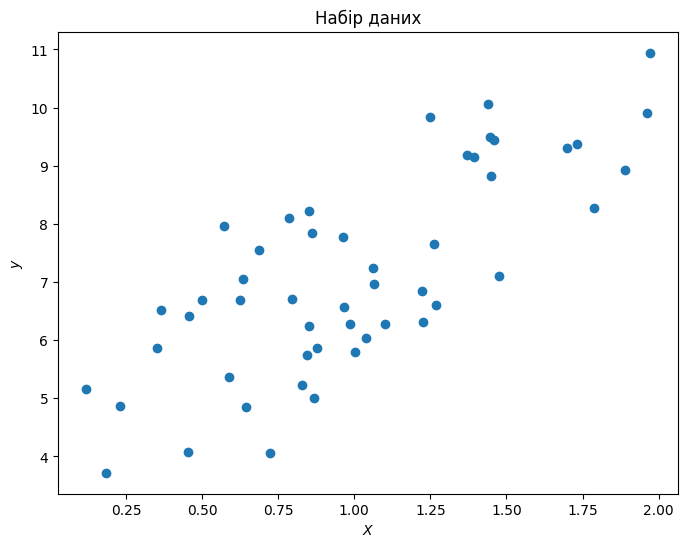

In [836]:
# We will use a simple training set
X = 2 * np.random.rand(50, 1)
y = 3 * X + 4 + np.random.randn(50, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

## Поділ набору даних

In [837]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (37, 1)
Shape y_train: (37, 1)
Shape X_test: (13, 1)
Shape y_test: (13, 1)


In [838]:
X_train[:,0].shape

(37,)

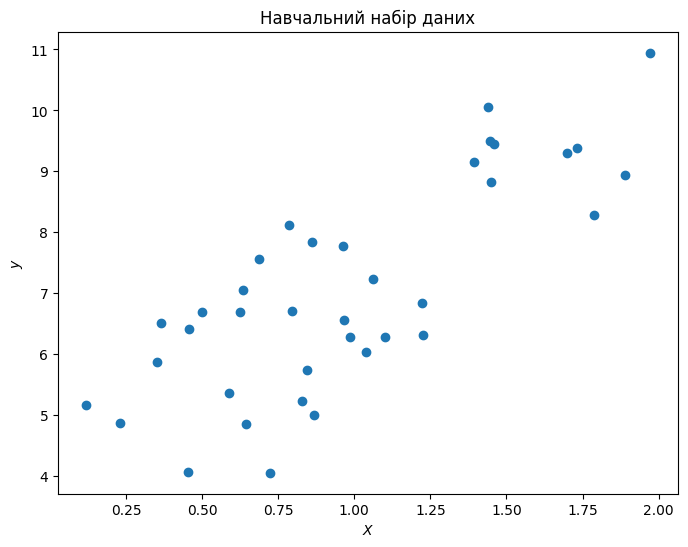

In [839]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.title("Навчальний набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

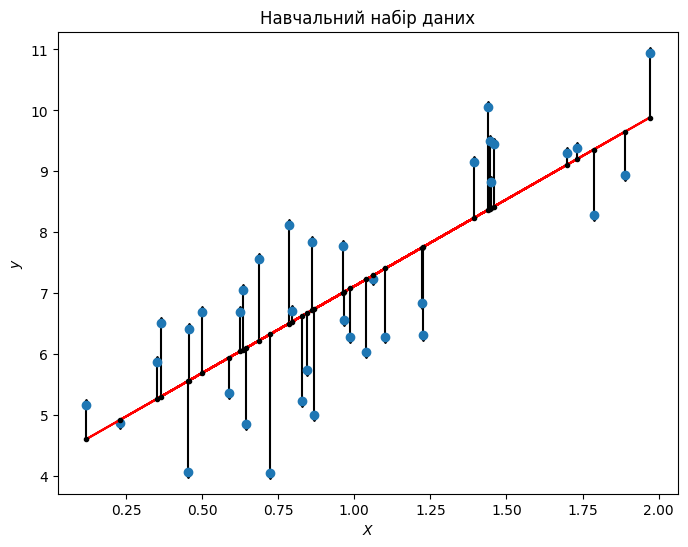

In [840]:
coef = np.polyfit(X_train[:,0], y_train[:,0], 1)
poly1d_fn = np.poly1d(coef)  # to create a linear function with coefficients
up = poly1d_fn(X_train[:,0]) - y_train[:,0] > 0
low= poly1d_fn(X_train[:,0]) - y_train[:,0] < 0

fig = plt.figure(figsize=(8,6))
plt.errorbar(X_train[:,0], poly1d_fn(X_train[:,0]), yerr=abs(poly1d_fn(X_train[:,0]) - y_train[:,0]),  lolims=low, uplims = up, fmt='.k')
plt.plot(X_train[:,0], y_train[:,0], 'o', X_train[:,0], poly1d_fn(X_train[:,0]), '-r')
# plt.scatter(X_train, y_train)
plt.title("Навчальний набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

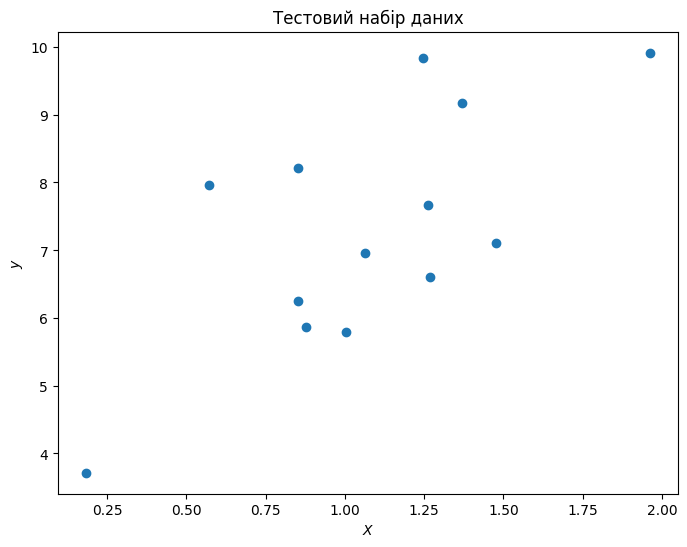

In [841]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test)
plt.title("Тестовий набір даних")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

In [842]:
n_samples, m_features = X_train.shape

In [843]:
n_samples

37

In [844]:
m_features

1

## Змінюємо форму $X$ та $y$ обох вибірок
$X = \text{X_train}$, 𝑋 — матриця форми (𝑚, 𝑛).

In [845]:
X_train = X_train.reshape((m_features, n_samples))

In [846]:
X_train.shape

(1, 37)

In [847]:
X_test = X_test.reshape((X_test.shape[1], X_test.shape[0]))

In [848]:
X_test.shape

(1, 13)

In [849]:
y_train = y_train.reshape((m_features,n_samples))

In [850]:
y_train.shape

(1, 37)

In [851]:
y_test = y_test.reshape((y_test.shape[1], y_test.shape[0]))

In [852]:
y_test.shape

(1, 13)

### Крок 0: Ініціалізувати ваги та зсув

In [853]:
def parameters_inititalization(m):
  """
  Ця функція ініціалізує вектор-рядок випадкових дійсних значень ваг форми (1, m),
  отриманих з нормального розподілу та зсув (довільне дійсне значення)

  Параметри:
  m -- кількість вхідних ознак для кожного навчального прикладу

  Повертає:
  W -- вектор-рядок ваг форми (1, m)
  b -- зсув (скаляр)
  """

  # BEGIN_YOUR_CODE
  W = np.random.randn(m, 1)
  b = 0

  return W, b
  # END_YOUR_CODE

In [854]:
m_features
W, b = parameters_inititalization(m_features)

In [855]:
W

array([[-0.31048223]])

In [856]:
W.shape

(1, 1)

In [857]:
b

0



### Крок 1: Обчислити лінійну комбінацію вхідних ознак та ваг, включаючи зсув



In [858]:
def forwardPropagate(X, W, b):
  """
  Ця функція обчислює лінійну комбінацію вхідних ознак та ваг, включаючи зсув

  Параметри:
  X -- вхідний вектор ознак форми (m, X_train.shape[1])
  W -- вектор-рядок ваг форми (1, m)
  b -- зсув моделі (скаляр)

  Повертає:
  z -- загальна зважена сума вхідних ознак, включаючи зсув
  y_hat -- прогноз моделі
  """

  # BEGIN_YOUR_CODE
  z = np.dot(W, X) + b
  y_hat = z
  return z, y_hat
  # END_YOUR_CODE

In [859]:
z, y_hat = forwardPropagate(X_train, W, b)

In [860]:
z

array([[-0.29864162, -0.43248262, -0.19702301, -0.07179491, -0.44676466,
        -0.11332088, -0.44986101, -0.52746696, -0.20054601, -0.38058572,
        -0.25759234, -0.03705785, -0.26755047, -0.21310135, -0.26931302,
        -0.5379472 , -0.18238599, -0.2246579 , -0.45271396, -0.29994711,
        -0.15552388, -0.24349104, -0.14174335, -0.58628982, -0.19390312,
        -0.33007451, -0.14086669, -0.55476292, -0.6119976 , -0.26273408,
        -0.3225818 , -0.44861167, -0.10894931, -0.34234688, -0.3065609 ,
        -0.37942389, -0.24717134]])

In [861]:
y_hat.shape

(1, 37)

### Крок 2: Обчислити усереднену втрату на всьому навчальному наборі даних. Цільова функція



In [862]:
def cost(n, y_hat, y_true):
  """
  Ця функція обчислює середнє квадратичне відхилення на всьому навчальному наборі даних

  Параметри:
  n -- загальна кількість навчальних прикладів
  y_hat -- вихідне значення лінійної регресії
  y_true -- істинне значення залежної змінної

  Повертає:
  J -- середнє квадратичне відхилення на всьому навчальному наборі даних
  """

  # BEGIN_YOUR_CODE
  y_true = np.array(y_true).flatten()
  y_hat = np.array(y_hat).flatten()

  J = np.mean((y_hat - y_true) ** 2)

  return float(J)
  # END_YOUR_CODE

In [863]:
J = cost(n_samples, y_hat, y_train)
J

57.46077808913447

### Крок 3: Розрахувати градієнти цільвої функції відносно ваг та зсуву

In [864]:
def backwardPropagate(n, X, y_hat, y_true):
  """
  Ця функція обчислює градієнти цільвої функції відносно ваг та зсуву

  Параметри:
  n -- загальна кількість навчальних прикладів
  X -- вхідний вектор ознак форми (1, X_train.shape[1])
  y_hat --  вихідне значення лінійної регресії
  y_true -- істинне значення залежної змінної

  Повертає:
  dW --  градієнт цільової функції відносно ваг моделі
  db -- градієнт цільової функції відносно зсуву моделі
  """

  # BEGIN_YOUR_CODE

  # Різниця прогнозів та істинних значень
  diff = y_hat - y_true  # (y_hat^(i) - y^(i))

  # Обчислення градієнта відносно ваг
  # dJ/dW = (2/n) * sum((y_hat^(i) - y^(i)) * x^(i))
  dW = (2/n) * np.sum(diff * X)

  # Обчислення градієнта відносно зсуву
  # dJ/db = (2/n) * sum(y_hat^(i) - y^(i))
  db = (2/n) * np.sum(diff)

  return dW, db

  # END_YOUR_CODE

In [865]:
dW, db = backwardPropagate(n_samples, X_train, y_hat, y_train)

In [866]:
dW

np.float64(-15.818407031912626)

In [867]:
dW.shape

()

In [868]:
db

np.float64(-14.703872110081507)

In [869]:
db.shape

()

### Крок 4: Оновити ваги та зсув

In [870]:
def update(alpha, dW, db, W, b):
  """
  Ця функція оновлює навчальні параметри моделі (ваги та зсув ) у напрямку мінімізації цільової функції

  Параметри:
  alpha -- швидкість  навчання (крок навчання)
  dW --  градієнт цільової функції відносно ваг моделі
  db -- градієнт цільової функції відносно зсуву моделі
  W -- вектор-рядок ваг моделі форми (1, m)
  b -- зсув моделі (скаляр)

  Повертає:
  W -- оновлений вектор-рядок ваг моделі форми (1, m)
  b -- оновлений зсув моделі (скаляр)
  """


  # BEGIN_YOUR_CODE
  W = W - alpha * dW
  b = b - alpha * db
  return W, float(b)
  # END_YOUR_CODE

In [871]:
W, b = update(0.0001, dW, db, W, b)

In [872]:
W

array([[-0.30890039]])

In [873]:
b

0.0014703872110081507

# Клас лінійної регресії

In [874]:
class LinearRegression:

  def __init__(self):
      pass
  def train_model(self, X, y, alpha=0.01, n_iters=100):
    """
    Trains a linear regression model using gradient descent
    """
    # Step 0: Initialize the parameters
    n_features, n_samples = X.shape
    self.W, self.b = parameters_inititalization(n_features)
    costs = []
    for i in range(n_iters):
      # Step 1: Compute a linear combination of the input features and weights
      z, y_hat = forwardPropagate(X_train, self.W, self.b)
      # Step 2: Compute cost over training set
      J = cost(n_samples, y_hat, y_train)
      costs.append(J)
      if i % 20 == 0:
        print(f"Усереднена втрата моделі на ітерації {i}: {J}")
      # Step 3: Compute the gradients
      dW, db = backwardPropagate(n_samples, X_train, y_hat, y_train)
      # Step 4: Update the parameters
      self.W, self.b = update(alpha, dW, db, self.W, self.b)
    return self.W, self.b, costs
  def predict(self, X):
    return np.dot(self.W, X) + self.b

  def evaluate(self, X, y):
      return 1 / X.shape[1] * np.sum(((np.dot(self.W, X) + self.b) - y)**2)

Усереднена втрата моделі на ітерації 0: 48.02547900804167
Усереднена втрата моделі на ітерації 20: 1.9074169665685659
Усереднена втрата моделі на ітерації 40: 1.2945316207306579
Усереднена втрата моделі на ітерації 60: 1.2585151316073193
Усереднена втрата моделі на ітерації 80: 1.235303000071176
Усереднена втрата моделі на ітерації 100: 1.2167322560080063
Усереднена втрата моделі на ітерації 120: 1.2018184744273142
Усереднена втрата моделі на ітерації 140: 1.1898408154694498
Усереднена втрата моделі на ітерації 160: 1.1802212266558663
Усереднена втрата моделі на ітерації 180: 1.1724954690099676
Усереднена втрата моделі на ітерації 200: 1.166290699515843
Усереднена втрата моделі на ітерації 220: 1.1613074776442889
Усереднена втрата моделі на ітерації 240: 1.1573053144302259
Усереднена втрата моделі на ітерації 260: 1.1540910665390307
Усереднена втрата моделі на ітерації 280: 1.1515096152204658
Усереднена втрата моделі на ітерації 300: 1.1494363803189593
Усереднена втрата моделі на ітера

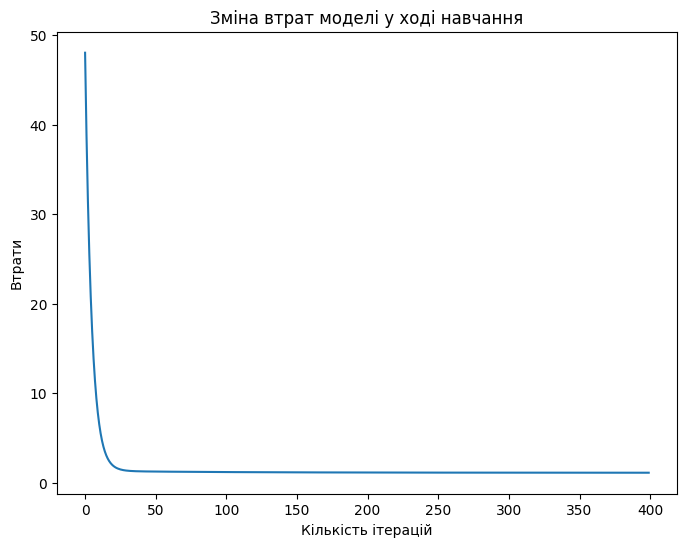

In [875]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_model(X_train, y_train, alpha=0.025, n_iters=400)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(400), costs)
plt.title("Зміна втрат моделі у ході навчання")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Втрати")
plt.show()


# Вивчені коефіцієнти: $ W$ та $b$

На початку ми згенерували вибірку за правилом: `y = 3 * X + 4 + np.random.randn(100, 1)`

In [876]:
w_trained

array([[2.96079888]])

In [877]:
b_trained

4.138864122253526

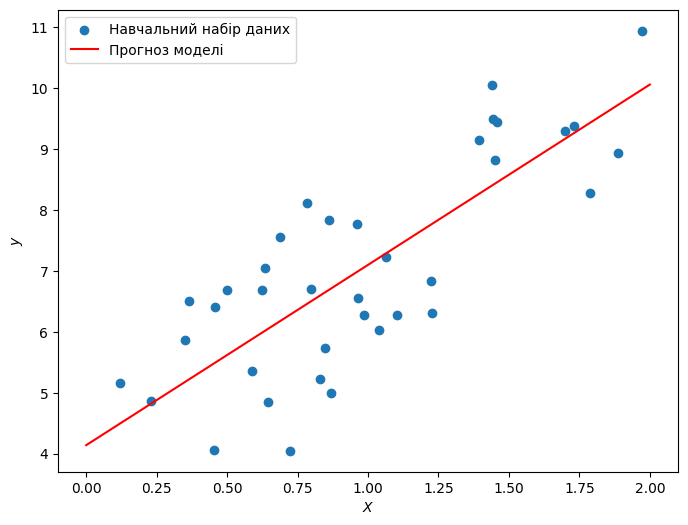

In [878]:
# Plot the trained model

fig = plt.figure(figsize=(8,6))

plt.scatter(X_train, y_train)
x = np.linspace(0, 2, 100)
x = x.reshape((x.shape[0], 1))
y_trained = w_trained * x + b_trained
plt.plot(x, y_trained, color='red')
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend(["Навчальний набір даних" , "Прогноз моделі"])
plt.show()

# Тестування моделі

In [879]:
n_samples, m_features = X_test.shape
y_hat_test = regressor.predict(X_test)

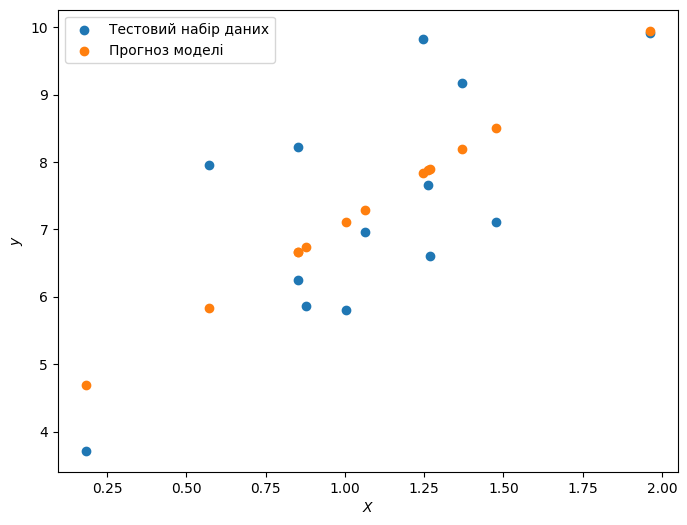

In [880]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_hat_test)
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend(["Тестовий набір даних" , "Прогноз моделі"])
plt.show()

In [881]:
cost_test = regressor.evaluate(X_test, y_test)
print(f"Усереднена втрата моделі на тестовій вибірці {cost_test}")

Усереднена втрата моделі на тестовій вибірці 1.4830409260522008




Завдання завершено.